<a href="https://colab.research.google.com/github/KaueAbbe/Qualidade_Ar/blob/main/Qualidade_do_Ar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objetivo**: Analisar dados de um experimento e criar um modelo de regressão capaz de prever valores.

 **Variável target:** PT08.S1 (CO)

Dicionário:

1.	Date (DD/MM/YYYY)
2.	Time (HH.MM.SS)
3.	PT08.S1 (CO) – Variável de predição
4.	Non Metanic HydroCarbons Concentration (mg/m^3)
5.	4 Benzene Concentration (mg/m^3)
6.	PT08.S2 (NMHC)
7.	NOx Concentration (ppb)
8.	PT08.S3 (NOx)
9.	8 NO2 Concentration (mg/m^3)
10.	PT08.S4 (NO2s)
11.	PT08.S5 (O3)
12.	Temperature (C)
13.	Relative Humidity (%)
14.	AH Absolute Humidity

# Tratamento dos dados

* Para fazer o tratamento de valores faltantes eu utilizei a seguinte estratratégia
1. Analisei quais colunas tinhas valores faltantes.
2. A feature com 90% de dados dados faltantes foi excluida dos dados para não gerar viés.
3. As demais features (15% a 5%) de dados faltantes tiveram seus missings alterados pela mediana de cada feature. Também foi criando uma colunas binomial informando existência ou ausência de dados.


* Para fazer o tratamento de outliers utilizei a seguinte estratégia
1. Analisei valores máximos e mínimos de cada feature para encontrar dados errôneos. Não foi encontrado por isso não retirei nenhum valor.

*Os dados tratados foram salvos



In [ ]:
#Montar o drive
from google.colab import drive
drive.mount('/content/drive')
#importe bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
#Importar os dados
dados = pd.read_excel('/content/drive/MyDrive/Data Science/Case - Qualidade do Ar/qualidade_do_ar.xlsx')
dados.head()

Date      Time  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
0 2004-03-10  18.00.00         1360       150      11.9           1046   
1 2004-03-10  19.00.00         1292       112       9.4            955   
2 2004-03-10  20.00.00         1402        88       9.0            939   
3 2004-03-10  21.00.00         1376        80       9.2            948   
4 2004-03-10  22.00.00         1272        51       6.5            836   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0      166          1056      113          1692         1268  13.6  48.9   
1      103          1174       92          1559          972  13.3  47.7   
2      131          1140      114          1555         1074  11.9  54.0   
3      172          1092      122          1584         1203  11.0  60.0   
4      131          1205      116          1490         1110  11.2  59.6   

       AH  
0  0.7578  
1  0.7255  
2  0.7502  
3  0.7867  
4  0.7888

In [ ]:
#Verificar tipos, missings e quantidade
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   PT08.S1(CO)    9357 non-null   int64         
 3   NMHC(GT)       9357 non-null   int64         
 4   C6H6(GT)       9357 non-null   float64       
 5   PT08.S2(NMHC)  9357 non-null   int64         
 6   NOx(GT)        9357 non-null   int64         
 7   PT08.S3(NOx)   9357 non-null   int64         
 8   NO2(GT)        9357 non-null   int64         
 9   PT08.S4(NO2)   9357 non-null   int64         
 10  PT08.S5(O3)    9357 non-null   int64         
 11  T              9357 non-null   float64       
 12  RH             9357 non-null   float64       
 13  AH             9357 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(8), object(1)
memory usage: 1023

* Não possui missings como faltantes, mas valores -200 é considerado missing.
* Tipos de dados parecem corretos.
* Existem 9357 linhas (entradas)

In [ ]:
# Analisar missings -200
dados.describe()

Date  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  \
count                           9357  9357.000000  9357.000000  9357.000000   
mean   2004-09-21 04:30:05.193972480  1048.990061  -159.090093     1.865683   
min              2004-03-10 00:00:00  -200.000000  -200.000000  -200.000000   
25%              2004-06-16 00:00:00   921.000000  -200.000000     4.000000   
50%              2004-09-21 00:00:00  1053.000000  -200.000000     7.900000   
75%              2004-12-28 00:00:00  1221.000000  -200.000000    13.600000   
max              2005-04-04 00:00:00  2040.000000  1189.000000    63.700000   
std                              NaN   329.832710   139.789093    41.380206   

       PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  \
count    9357.000000  9357.000000   9357.000000  9357.000000   9357.000000   
mean      894.595276   168.616971    794.990168    58.148873   1391.479641   
min      -200.000000  -200.000000   -200.000000  -200.000000   -200.000000   
25%       711.000000    50.000000    637.000000    53.000000   1185.000000   
50%       895.000000   141.000000    794.000000    96.000000   1446.000000   
75%      1105.000000   284.000000    960.000000   133.000000   1662.000000   
max      2214.000000  1479.000000   2683.000000   340.000000   2775.000000   
std       342.333252   257.433866    321.993552   126.940455    467.210125   

       PT08.S5(O3)            T           RH           AH  
count  9357.000000  9357.000000  9357.000000  9357.000000  
mean    975.072032     9.778305    39.485380    -6.837604  
min    -200.000000  -200.000000  -200.000000  -200.000000  
25%     700.000000    10.900000    34.100000     0.692300  
50%     942.000000    17.200000    48.600000     0.976800  
75%    1255.000000    24.100000    61.900000     1.296200  
max    2523.000000    44.600000    88.700000     2.231000  
std     456.938184    43.203623    51.216145    38.976670

In [ ]:
count = (dados == -200).sum()
count

Date                0
Time                0
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [ ]:
# Verificando porcentagem de dados presente.
(9357 - count)/9357 * 100

Date             100.000000
Time             100.000000
PT08.S1(CO)       96.088490
NMHC(GT)           9.768088
C6H6(GT)          96.088490
PT08.S2(NMHC)     96.088490
NOx(GT)           82.483702
PT08.S3(NOx)      96.088490
NO2(GT)           82.451640
PT08.S4(NO2)      96.088490
PT08.S5(O3)       96.088490
T                 96.088490
RH                96.088490
AH                96.088490
dtype: float64

* Variável NMHC(GT) tem menos de 10% de dados.

* Criarei colunas informativas quanto a ser ou não missing.
* Adicionarei dados nas colunas, trocando pela mediana.
* Removerei a coluna 'NMHC(GT)' pois adicionar valores baseado em apenas 10% criará muito viés.
* Removerei os dados do target, pois há apenas 4% ausente e assim eu não crio viés no target.

In [ ]:
dados =  dados.drop(columns = ['NMHC(GT)'], axis =  1)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   PT08.S1(CO)    9357 non-null   int64         
 3   C6H6(GT)       9357 non-null   float64       
 4   PT08.S2(NMHC)  9357 non-null   int64         
 5   NOx(GT)        9357 non-null   int64         
 6   PT08.S3(NOx)   9357 non-null   int64         
 7   NO2(GT)        9357 non-null   int64         
 8   PT08.S4(NO2)   9357 non-null   int64         
 9   PT08.S5(O3)    9357 non-null   int64         
 10  T              9357 non-null   float64       
 11  RH             9357 non-null   float64       
 12  AH             9357 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(7), object(1)
memory usage: 950.4+ KB


In [ ]:
dados.columns

Index(['Date', 'Time', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH'],
      dtype='object')

In [ ]:
# Criando um imputer
from sklearn.impute import SimpleImputer
def imputer (coluna):
  imputer = SimpleImputer(missing_values = -200, strategy = 'median') # Criar o imputer
  dados[coluna + '_nan'] = (dados[coluna] == -200).astype(int) #criar uma coluna is_miss
  dados[coluna] = imputer.fit_transform(dados[coluna].values.reshape(-1,1)) # Imputar os dados
  print('ok')

colunas = ['C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH']
for coluna in colunas:
  imputer(coluna)
dados.head()

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


Date      Time  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0 2004-03-10  18.00.00         1360      11.9         1046.0    166.0   
1 2004-03-10  19.00.00         1292       9.4          955.0    103.0   
2 2004-03-10  20.00.00         1402       9.0          939.0    131.0   
3 2004-03-10  21.00.00         1376       9.2          948.0    172.0   
4 2004-03-10  22.00.00         1272       6.5          836.0    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  ...  C6H6(GT)_nan  \
0        1056.0    113.0        1692.0       1268.0  ...             0   
1        1174.0     92.0        1559.0        972.0  ...             0   
2        1140.0    114.0        1555.0       1074.0  ...             0   
3        1092.0    122.0        1584.0       1203.0  ...             0   
4        1205.0    116.0        1490.0       1110.0  ...             0   

   PT08.S2(NMHC)_nan  NOx(GT)_nan  PT08.S3(NOx)_nan  NO2(GT)_nan  \
0                  0            0                 0            0   
1                  0            0                 0            0   
2                  0            0                 0            0   
3                  0            0                 0            0   
4                  0            0                 0            0   

   PT08.S4(NO2)_nan  PT08.S5(O3)_nan  T_nan  RH_nan  AH_nan  
0                 0                0      0       0       0  
1                 0                0      0       0       0  
2                 0                0      0       0       0  
3                 0                0      0       0       0  
4                 0                0      0       0       0  

[5 rows x 23 columns]

In [ ]:
dados.describe()

Date  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)  \
count                           9357  9357.000000  9357.000000    9357.000000   
mean   2004-09-21 04:30:05.193972480  1048.990061    10.009447     937.973923   
min              2004-03-10 00:00:00  -200.000000     0.100000     383.000000   
25%              2004-06-16 00:00:00   921.000000     4.600000     743.000000   
50%              2004-09-21 00:00:00  1053.000000     8.200000     909.000000   
75%              2004-12-28 00:00:00  1221.000000    13.600000    1105.000000   
max              2005-04-04 00:00:00  2040.000000    63.700000    2214.000000   
std                              NaN   329.832710     7.311771     261.625561   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    235.178903    834.339959   112.373303   1456.528054  1020.562894   
min       2.000000    322.000000     2.000000    551.000000   221.000000   
25%     112.000000    666.000000    86.000000   1242.000000   742.000000   
50%     180.000000    806.000000   109.000000   1463.000000   963.000000   
75%     284.000000    960.000000   133.000000   1662.000000  1255.000000   
max    1479.000000   2683.000000   340.000000   2775.000000  2523.000000   
std     195.091025    251.808888    43.948519    339.370072   390.784960   

                 T  ...  C6H6(GT)_nan  PT08.S2(NMHC)_nan  NOx(GT)_nan  \
count  9357.000000  ...   9357.000000        9357.000000  9357.000000   
mean     18.297574  ...      0.039115           0.039115     0.175163   
min      -1.900000  ...      0.000000           0.000000     0.000000   
25%      12.000000  ...      0.000000           0.000000     0.000000   
50%      17.800000  ...      0.000000           0.000000     0.000000   
75%      24.100000  ...      0.000000           0.000000     0.000000   
max      44.600000  ...      1.000000           1.000000     1.000000   
std       8.658221  ...      0.193879           0.193879     0.380127   

       PT08.S3(NOx)_nan  NO2(GT)_nan  PT08.S4(NO2)_nan  PT08.S5(O3)_nan  \
count       9357.000000  9357.000000       9357.000000      9357.000000   
mean           0.039115     0.175484          0.039115         0.039115   
min            0.000000     0.000000          0.000000         0.000000   
25%            0.000000     0.000000          0.000000         0.000000   
50%            0.000000     0.000000          0.000000         0.000000   
75%            0.000000     0.000000          0.000000         0.000000   
max            1.000000     1.000000          1.000000         1.000000   
std            0.193879     0.380401          0.193879         0.193879   

             T_nan       RH_nan       AH_nan  
count  9357.000000  9357.000000  9357.000000  
mean      0.039115     0.039115     0.039115  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000  
std       0.193879     0.193879     0.193879  

[8 rows x 22 columns]

In [ ]:
dados_sem_nan = dados[dados['PT08.S1(CO)'] != -200]
dados_sem_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8991 entries, 0 to 9356
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               8991 non-null   datetime64[ns]
 1   Time               8991 non-null   object        
 2   PT08.S1(CO)        8991 non-null   int64         
 3   C6H6(GT)           8991 non-null   float64       
 4   PT08.S2(NMHC)      8991 non-null   float64       
 5   NOx(GT)            8991 non-null   float64       
 6   PT08.S3(NOx)       8991 non-null   float64       
 7   NO2(GT)            8991 non-null   float64       
 8   PT08.S4(NO2)       8991 non-null   float64       
 9   PT08.S5(O3)        8991 non-null   float64       
 10  T                  8991 non-null   float64       
 11  RH                 8991 non-null   float64       
 12  AH                 8991 non-null   float64       
 13  C6H6(GT)_nan       8991 non-null   int64         
 14  PT08.S2(NMHC)

#### Duplicatas
* Não possuem

In [ ]:
dados_sem_nan.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8991 entries, 0 to 9356
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               8991 non-null   datetime64[ns]
 1   Time               8991 non-null   object        
 2   PT08.S1(CO)        8991 non-null   int64         
 3   C6H6(GT)           8991 non-null   float64       
 4   PT08.S2(NMHC)      8991 non-null   float64       
 5   NOx(GT)            8991 non-null   float64       
 6   PT08.S3(NOx)       8991 non-null   float64       
 7   NO2(GT)            8991 non-null   float64       
 8   PT08.S4(NO2)       8991 non-null   float64       
 9   PT08.S5(O3)        8991 non-null   float64       
 10  T                  8991 non-null   float64       
 11  RH                 8991 non-null   float64       
 12  AH                 8991 non-null   float64       
 13  C6H6(GT)_nan       8991 non-null   int64         
 14  PT08.S2(NMHC)

#### Outliers:

Pelo describe existem valores outliers naturais, que não significa erros de valor.
* Portante não serão removidos outros valores

In [ ]:
dados_sem_nan.describe()

Date  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)  \
count                           8991  8991.000000  8991.000000    8991.000000   
mean   2004-09-19 17:30:48.648648704  1099.833166    10.083105     939.153376   
min              2004-03-10 00:00:00   647.000000     0.100000     383.000000   
25%              2004-06-14 00:00:00   937.000000     4.400000     734.500000   
50%              2004-09-20 00:00:00  1063.000000     8.200000     909.000000   
75%              2004-12-26 00:00:00  1231.000000    14.000000    1116.000000   
max              2005-04-04 00:00:00  2040.000000    63.700000    2214.000000   
std                              NaN   217.080037     7.449820     266.831429   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  8991.000000   8991.000000  8991.000000   8991.000000  8991.000000   
mean    231.156935    835.493605   111.586142   1456.264598  1022.906128   
min       2.000000    322.000000     2.000000    551.000000   221.000000   
25%     112.000000    658.000000    85.000000   1227.000000   731.500000   
50%     180.000000    806.000000   109.000000   1463.000000   963.000000   
75%     280.000000    969.500000   132.000000   1674.000000  1273.500000   
max    1479.000000   2683.000000   333.000000   2775.000000  2523.000000   
std     188.619449    256.817320    43.205808    346.206794   398.484288   

                 T  ...  C6H6(GT)_nan  PT08.S2(NMHC)_nan  NOx(GT)_nan  \
count  8991.000000  ...        8991.0             8991.0  8991.000000   
mean     18.317829  ...           0.0                0.0     0.177400   
min      -1.900000  ...           0.0                0.0     0.000000   
25%      11.800000  ...           0.0                0.0     0.000000   
50%      17.800000  ...           0.0                0.0     0.000000   
75%      24.400000  ...           0.0                0.0     0.000000   
max      44.600000  ...           0.0                0.0     1.000000   
std       8.832116  ...           0.0                0.0     0.382028   

       PT08.S3(NOx)_nan  NO2(GT)_nan  PT08.S4(NO2)_nan  PT08.S5(O3)_nan  \
count            8991.0  8991.000000            8991.0           8991.0   
mean                0.0     0.177733               0.0              0.0   
min                 0.0     0.000000               0.0              0.0   
25%                 0.0     0.000000               0.0              0.0   
50%                 0.0     0.000000               0.0              0.0   
75%                 0.0     0.000000               0.0              0.0   
max                 0.0     1.000000               0.0              0.0   
std                 0.0     0.382309               0.0              0.0   

        T_nan  RH_nan  AH_nan  
count  8991.0  8991.0  8991.0  
mean      0.0     0.0     0.0  
min       0.0     0.0     0.0  
25%       0.0     0.0     0.0  
50%       0.0     0.0     0.0  
75%       0.0     0.0     0.0  
max       0.0     0.0     0.0  
std       0.0     0.0     0.0  

[8 rows x 22 columns]

In [ ]:
dados_sem_nan.to_csv('/content/drive/MyDrive/Data Science/Case - Qualidade do Ar/dados_tratados.csv', index = False)

# Análise Exploratória

In [ ]:
#Montar o drive
from google.colab import drive
drive.mount('/content/drive')
#importe bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Importar os dados
dados = pd.read_csv('/content/drive/MyDrive/Data Science/Case - Qualidade do Ar/dados_tratados.csv')
dados.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Date      Time  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0  2004-03-10  18.00.00         1360      11.9         1046.0    166.0   
1  2004-03-10  19.00.00         1292       9.4          955.0    103.0   
2  2004-03-10  20.00.00         1402       9.0          939.0    131.0   
3  2004-03-10  21.00.00         1376       9.2          948.0    172.0   
4  2004-03-10  22.00.00         1272       6.5          836.0    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  ...  C6H6(GT)_nan  \
0        1056.0    113.0        1692.0       1268.0  ...             0   
1        1174.0     92.0        1559.0        972.0  ...             0   
2        1140.0    114.0        1555.0       1074.0  ...             0   
3        1092.0    122.0        1584.0       1203.0  ...             0   
4        1205.0    116.0        1490.0       1110.0  ...             0   

   PT08.S2(NMHC)_nan  NOx(GT)_nan  PT08.S3(NOx)_nan  NO2(GT)_nan  \
0                  0            0                 0            0   
1                  0            0                 0            0   
2                  0            0                 0            0   
3                  0            0                 0            0   
4                  0            0                 0            0   

   PT08.S4(NO2)_nan  PT08.S5(O3)_nan  T_nan  RH_nan  AH_nan  
0                 0                0      0       0       0  
1                 0                0      0       0       0  
2                 0                0      0       0       0  
3                 0                0      0       0       0  
4                 0                0      0       0       0  

[5 rows x 23 columns]

In [ ]:
dados.columns

Index(['Date', 'Time', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH', 'C6H6(GT)_nan', 'PT08.S2(NMHC)_nan', 'NOx(GT)_nan',
       'PT08.S3(NOx)_nan', 'NO2(GT)_nan', 'PT08.S4(NO2)_nan',
       'PT08.S5(O3)_nan', 'T_nan', 'RH_nan', 'AH_nan'],
      dtype='object')

## Análise dados Contínuos
* Uni e Bivariada


In [ ]:
dados_cont = dados[dados.columns[2:13]]
dados_cat = dados[dados.columns[13:]]

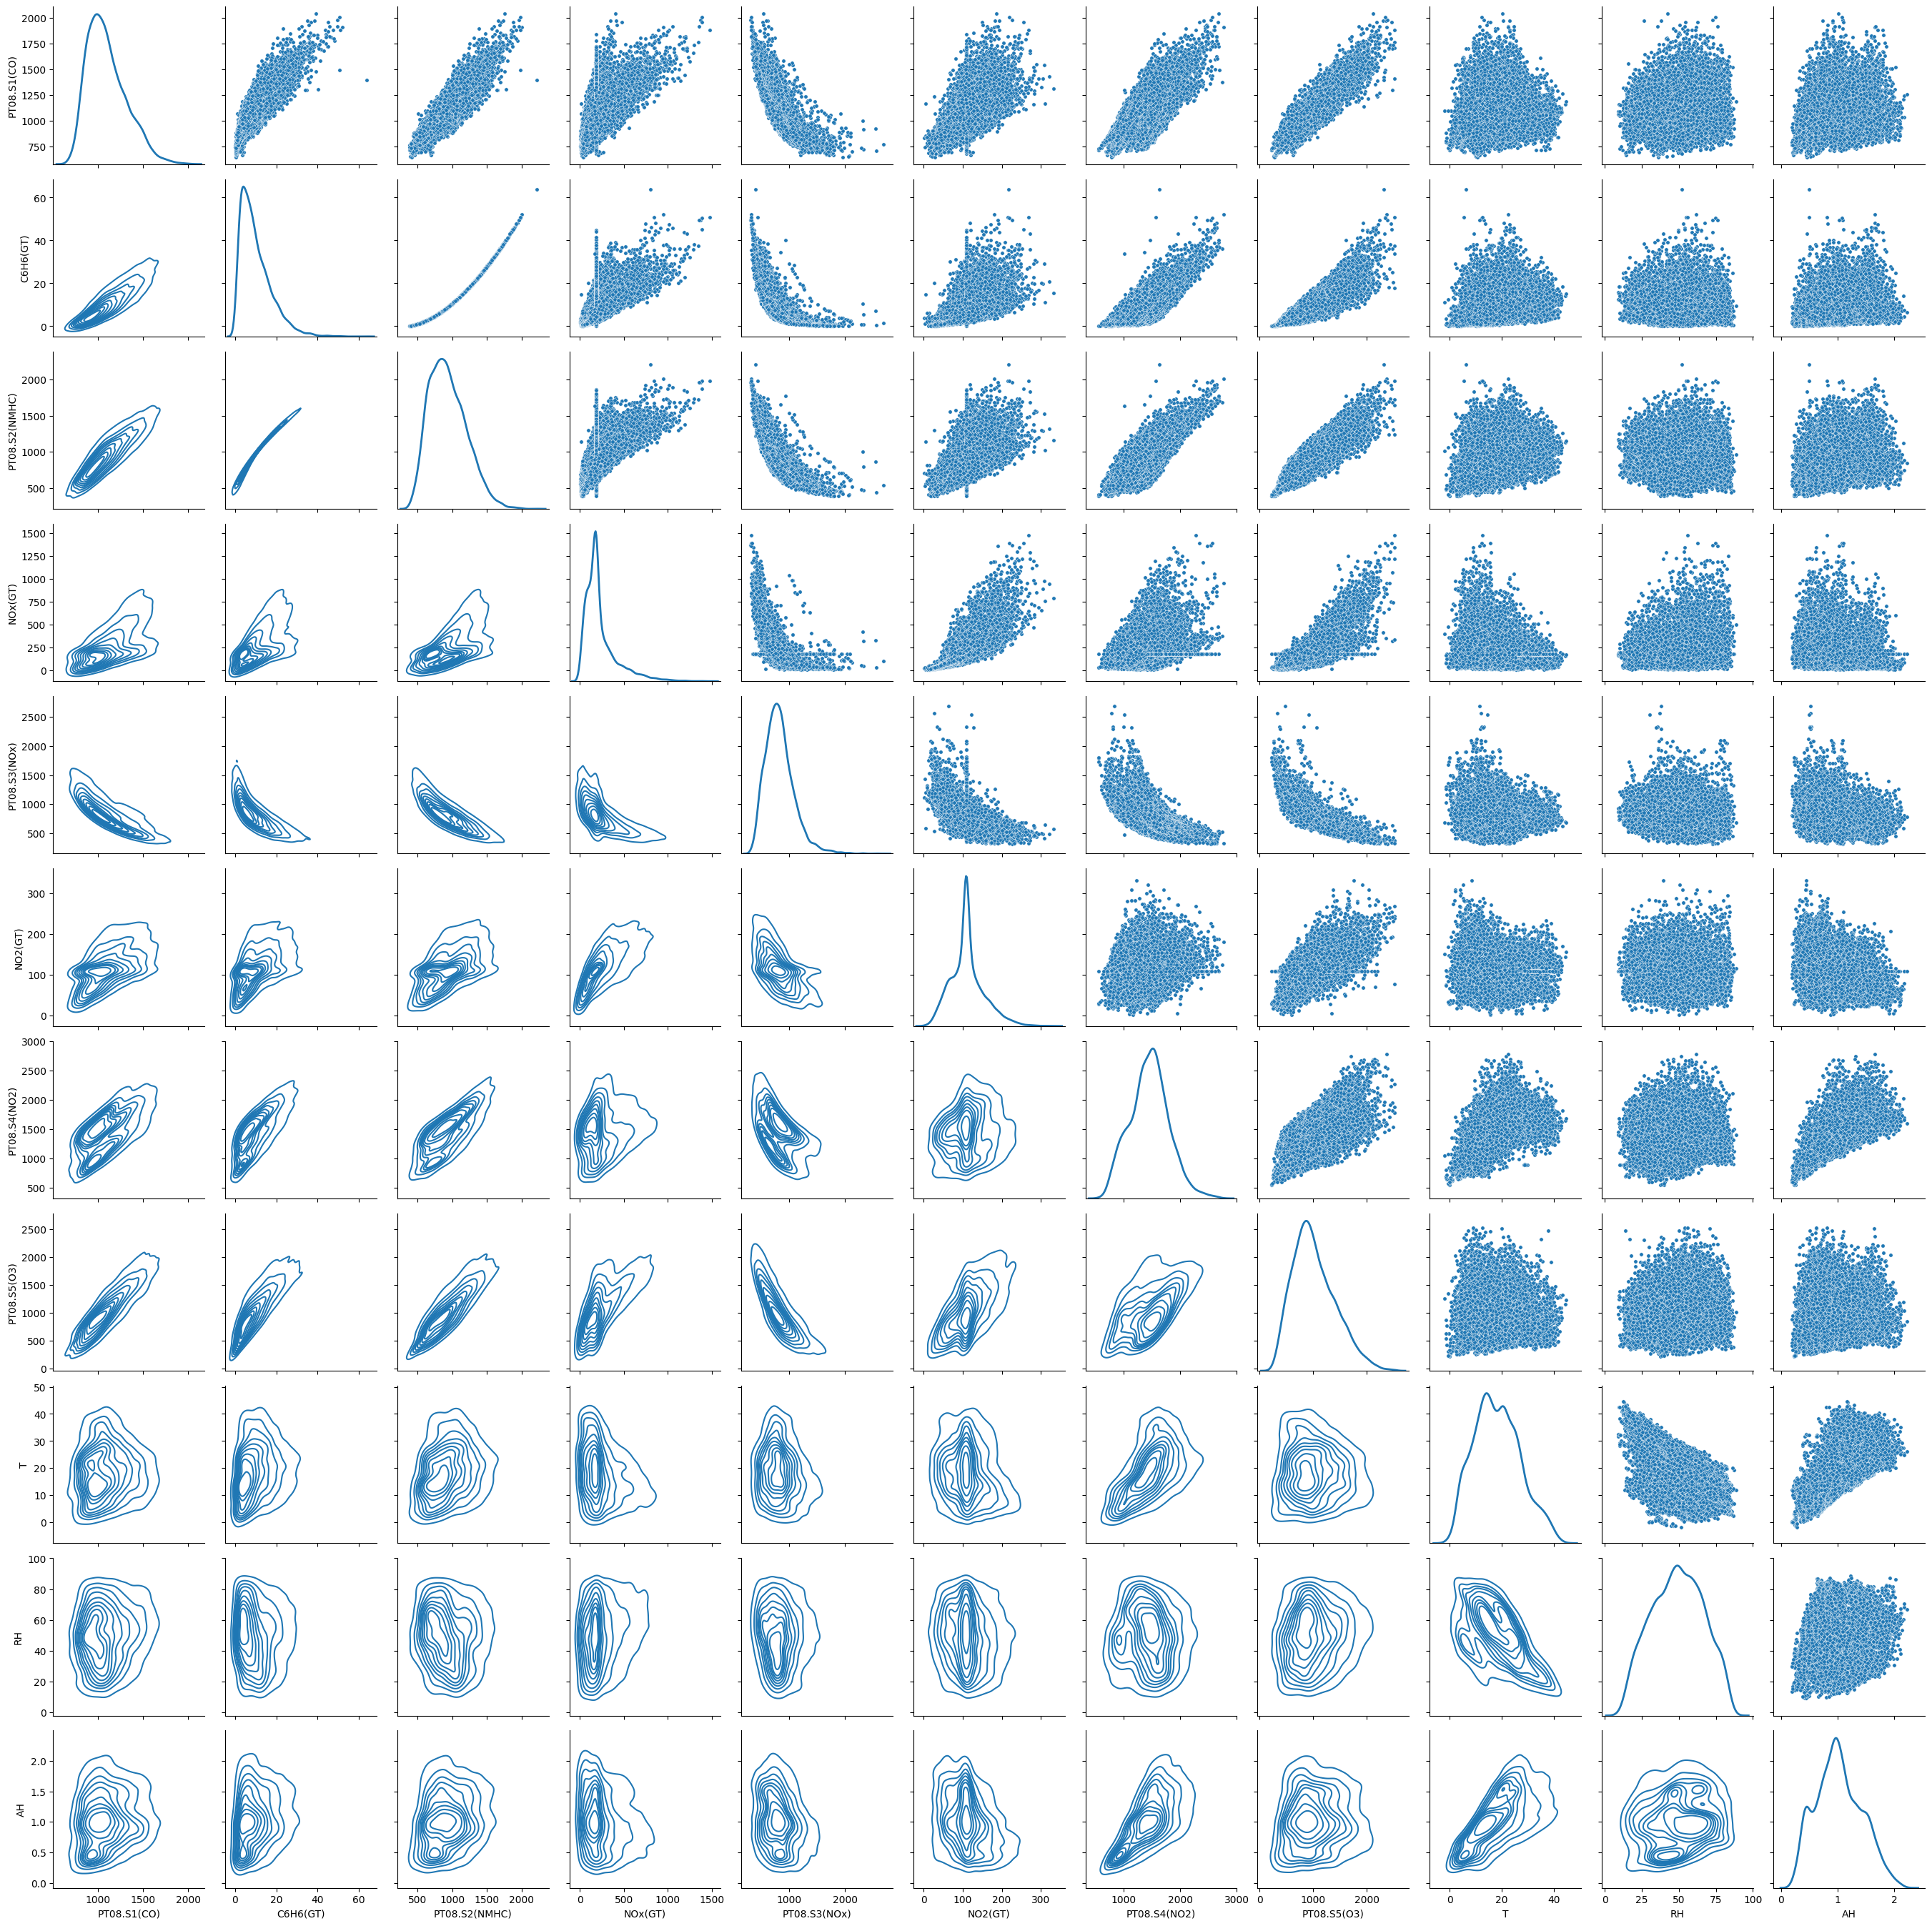

In [ ]:
g = sns.PairGrid(dados_cont, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

* T, RH e AH são os mais próximos de distribuições normais.
* O restante tem distribuição de cauda longa à direita.
* Existe correção entre as features, sendo a maior entre C6H6 e NMHC
* Target tem baixa correlação com T, RH e AH

In [ ]:
#Correlação entre os dados
dados_cont.corr()[dados_cont.corr() >= 0.95]

PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
PT08.S1(CO)            1.0       NaN            NaN      NaN           NaN   
C6H6(GT)               NaN   1.00000        0.98195      NaN           NaN   
PT08.S2(NMHC)          NaN   0.98195        1.00000      NaN           NaN   
NOx(GT)                NaN       NaN            NaN      1.0           NaN   
PT08.S3(NOx)           NaN       NaN            NaN      NaN           1.0   
NO2(GT)                NaN       NaN            NaN      NaN           NaN   
PT08.S4(NO2)           NaN       NaN            NaN      NaN           NaN   
PT08.S5(O3)            NaN       NaN            NaN      NaN           NaN   
T                      NaN       NaN            NaN      NaN           NaN   
RH                     NaN       NaN            NaN      NaN           NaN   
AH                     NaN       NaN            NaN      NaN           NaN   

               NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)    T   RH   AH  
PT08.S1(CO)        NaN           NaN          NaN  NaN  NaN  NaN  
C6H6(GT)           NaN           NaN          NaN  NaN  NaN  NaN  
PT08.S2(NMHC)      NaN           NaN          NaN  NaN  NaN  NaN  
NOx(GT)            NaN           NaN          NaN  NaN  NaN  NaN  
PT08.S3(NOx)       NaN           NaN          NaN  NaN  NaN  NaN  
NO2(GT)            1.0           NaN          NaN  NaN  NaN  NaN  
PT08.S4(NO2)       NaN           1.0          NaN  NaN  NaN  NaN  
PT08.S5(O3)        NaN           NaN          1.0  NaN  NaN  NaN  
T                  NaN           NaN          NaN  1.0  NaN  NaN  
RH                 NaN           NaN          NaN  NaN  1.0  NaN  
AH                 NaN           NaN          NaN  NaN  NaN  1.0

<Axes: >

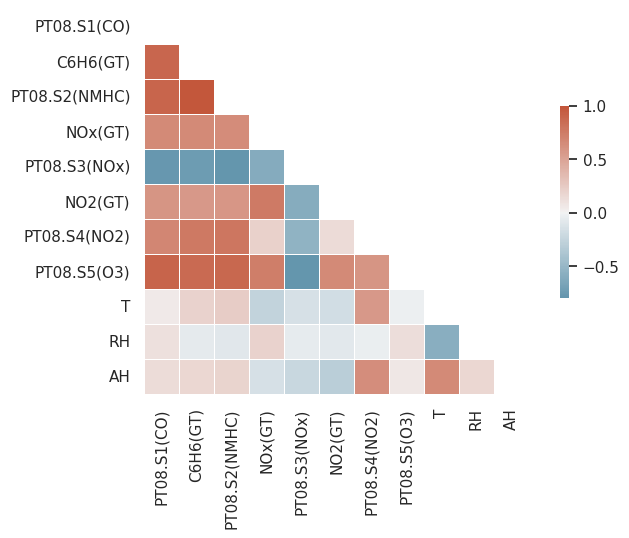

In [ ]:
#Fazer gráfico de correção
corr = dados_cont.corr()

# Gera máscara para triângulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Cria matplotlib figura
f, ax = plt.subplots(figsize=(8, 5))

#Cria um colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Desenha o colormap, com máscara cor e configurações
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

* O target tem baixa correlação apenas com T, RH e AH.
* Target tem correlação negativa apenas com PT08.S3(NOx).
* C6H6 e NMHC tem altíssima correlação: 0.98

In [84]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
plt.rcParams['axes.linewidth'] = 0

Text(0, 0.5, 'Variáveis')

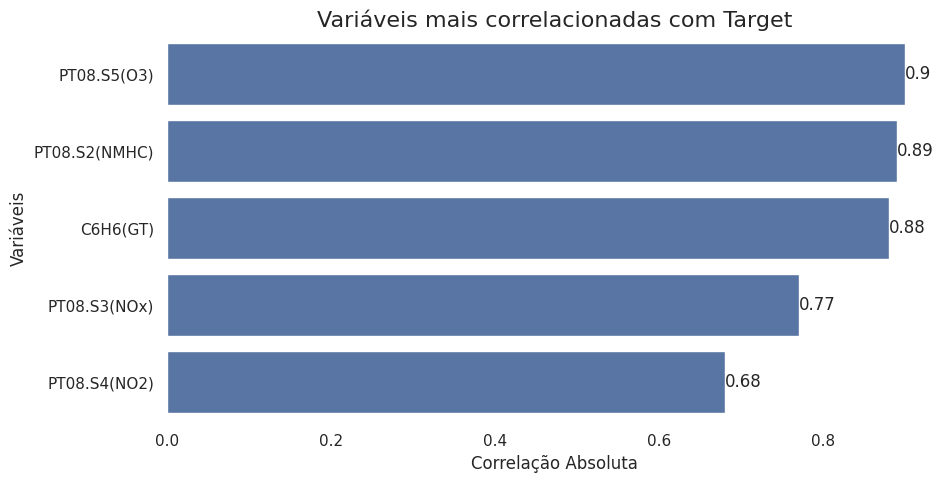

In [ ]:
# Quais variáveis mais correlacionadas com target?
data_mais_correlacionados = abs(dados_cont.corr()['PT08.S1(CO)']).sort_values(ascending = False)[1:6].round(2)
plt.figure(figsize = (10,5))
ax = sns.barplot(y = data_mais_correlacionados.index, x = data_mais_correlacionados, )
for i in ax.containers:
    ax.bar_label(i,)

plt.title('Variáveis mais correlacionadas com Target',  fontsize = 16)
plt.xlabel('Correlação Absoluta', fontsize = 12)
plt.ylabel('Variáveis', fontsize = 12)

* Quais valores de mediana destes valores? Coloca acima como estatística descritiva.
* Valores de amplitude? Estatística descritiva.

In [ ]:
dados.head(10)

Date      Time  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0 2004-03-10  18.00.00         1360      11.9         1046.0    166.0   
1 2004-03-10  19.00.00         1292       9.4          955.0    103.0   
2 2004-03-10  20.00.00         1402       9.0          939.0    131.0   
3 2004-03-10  21.00.00         1376       9.2          948.0    172.0   
4 2004-03-10  22.00.00         1272       6.5          836.0    131.0   
5 2004-03-10  23.00.00         1197       4.7          750.0     89.0   
6 2004-03-11  00.00.00         1185       3.6          690.0     62.0   
7 2004-03-11  01.00.00         1136       3.3          672.0     62.0   
8 2004-03-11  02.00.00         1094       2.3          609.0     45.0   
9 2004-03-11  03.00.00         1010       1.7          561.0    180.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  ...  PT08.S2(NMHC)_nan  \
0        1056.0    113.0        1692.0       1268.0  ...                  0   
1        1174.0     92.0        1559.0        972.0  ...                  0   
2        1140.0    114.0        1555.0       1074.0  ...                  0   
3        1092.0    122.0        1584.0       1203.0  ...                  0   
4        1205.0    116.0        1490.0       1110.0  ...                  0   
5        1337.0     96.0        1393.0        949.0  ...                  0   
6        1462.0     77.0        1333.0        733.0  ...                  0   
7        1453.0     76.0        1333.0        730.0  ...                  0   
8        1579.0     60.0        1276.0        620.0  ...                  0   
9        1705.0    109.0        1235.0        501.0  ...                  0   

   NOx(GT)_nan  PT08.S3(NOx)_nan  NO2(GT)_nan  PT08.S4(NO2)_nan  \
0            0                 0            0                 0   
1            0                 0            0                 0   
2            0                 0            0                 0   
3            0                 0            0                 0   
4            0                 0            0                 0   
5            0                 0            0                 0   
6            0                 0            0                 0   
7            0                 0            0                 0   
8            0                 0            0                 0   
9            1                 0            1                 0   

   PT08.S5(O3)_nan  T_nan  RH_nan  AH_nan    weekday  
0                0      0       0       0  Wednesday  
1                0      0       0       0  Wednesday  
2                0      0       0       0  Wednesday  
3                0      0       0       0  Wednesday  
4                0      0       0       0  Wednesday  
5                0      0       0       0  Wednesday  
6                0      0       0       0   Thursday  
7                0      0       0       0   Thursday  
8                0      0       0       0   Thursday  
9                0      0       0       0   Thursday  

[10 rows x 24 columns]

In [ ]:
dados['Date'] = pd.to_datetime(dados['Date'])
dados['weekday'] = dados['Date'].dt.day_name()

In [ ]:
dados['horas'] = pd.to_datetime(dados['Time'], format = '%H:%M:%S').dt.hour
dados['horas']

0       18
1       19
2       20
3       21
4       22
        ..
8986    10
8987    11
8988    12
8989    13
8990    14
Name: horas, Length: 8991, dtype: int32

In [ ]:
dados_sem_time = dados.drop(columns = ['Time'], axis = 1)
dados_sem_time.groupby(by ='weekday').median()['PT08.S1(CO)'].sort_values()

weekday
Sunday        989.0
Monday       1028.0
Saturday     1059.0
Tuesday      1085.0
Wednesday    1092.0
Friday       1098.5
Thursday     1106.0
Name: PT08.S1(CO), dtype: float64

<ipython-input-55-02df0f5b0401>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y = dias_maiores_CO.index, x = dias_maiores_CO,palette = color )


Text(0, 0.5, 'Dias da Semana')

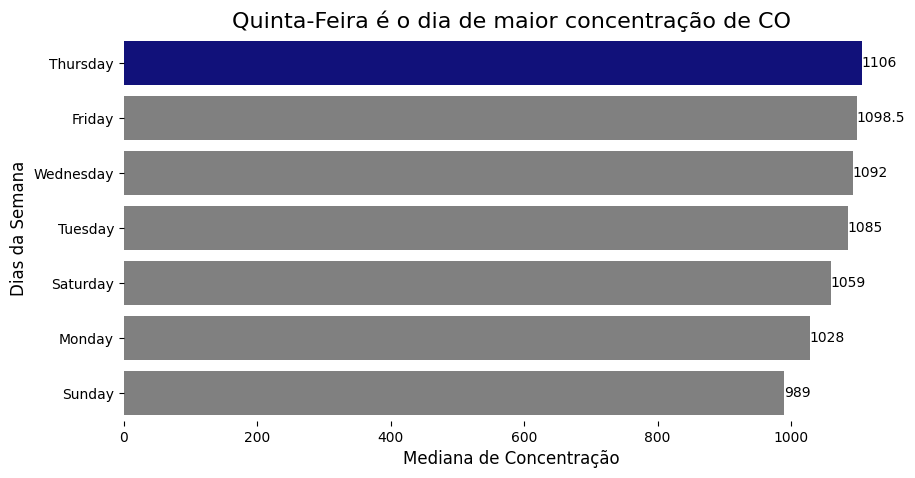

In [ ]:
# Quais variáveis mais correlacionadas com target?
dias_maiores_CO = dados_sem_time.groupby(by ='weekday').median()['PT08.S1(CO)'].sort_values(ascending = False)
plt.figure(figsize = (10,5))
color = ['gray']*7
color[0] = 'darkblue'
ax = sns.barplot(y = dias_maiores_CO.index, x = dias_maiores_CO,palette = color )
for i in ax.containers:
    ax.bar_label(i,)

plt.title('Quinta-Feira é o dia de maior concentração de CO',  fontsize = 16)
plt.xlabel('Mediana de Concentração', fontsize = 12)
plt.ylabel('Dias da Semana', fontsize = 12)

In [ ]:
dados_sem_time[dados_sem_time['weekday'] == 'Thursday'].drop('weekday', axis = 1).groupby(by ='horas').median()['PT08.S1(CO)'].sort_values(ascending = False  )

horas
18    1368.0
19    1364.0
8     1347.0
9     1337.0
20    1299.0
17    1261.0
10    1207.0
21    1190.0
16    1178.5
15    1153.0
7     1144.0
11    1141.0
14    1133.5
12    1129.0
22    1126.0
13    1121.0
23    1107.0
0     1045.0
1      998.5
6      953.0
2      924.5
3      892.5
5      883.0
4      867.5
Name: PT08.S1(CO), dtype: float64

<ipython-input-74-9d5bf7f04e26>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x = dias_maiores_CO.index, y = dias_maiores_CO,palette = color )
<ipython-input-74-9d5bf7f04e26>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(x = dias_maiores_CO.index, y = dias_maiores_CO,palette = color )


Text(0, 0.5, 'Concentração de CO')

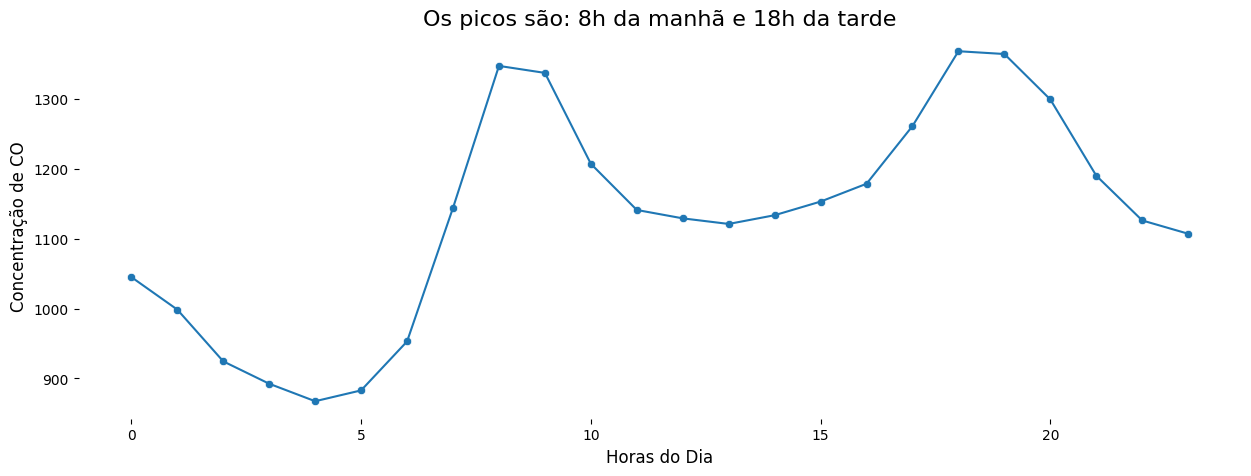

In [ ]:
# Quais variáveis mais correlacionadas com target?
dias_maiores_CO =dados_sem_time[dados_sem_time['weekday'] == 'Thursday'].drop('weekday', axis = 1)
dias_maiores_CO = dias_maiores_CO.groupby(by ='horas').median()['PT08.S1(CO)'].sort_values(ascending = False)
plt.figure(figsize = (15,5))
color = ['gray']*24
color[0] = 'darkblue'
ax = sns.lineplot(x = dias_maiores_CO.index, y = dias_maiores_CO,palette = color )
ax = sns.scatterplot(x = dias_maiores_CO.index, y = dias_maiores_CO,palette = color )


plt.title('Os picos são: 8h da manhã e 18h da tarde',  fontsize = 16)
plt.xlabel('Horas do Dia', fontsize = 12)
plt.ylabel('Concentração de CO', fontsize = 12)

In [ ]:
dados_cat

C6H6(GT)_nan  PT08.S2(NMHC)_nan  NOx(GT)_nan  PT08.S3(NOx)_nan  \
0                0                  0            0                 0   
1                0                  0            0                 0   
2                0                  0            0                 0   
3                0                  0            0                 0   
4                0                  0            0                 0   
...            ...                ...          ...               ...   
8986             0                  0            0                 0   
8987             0                  0            0                 0   
8988             0                  0            0                 0   
8989             0                  0            0                 0   
8990             0                  0            0                 0   

      NO2(GT)_nan  PT08.S4(NO2)_nan  PT08.S5(O3)_nan  T_nan  RH_nan  AH_nan  
0               0                 0                0      0       0       0  
1               0                 0                0      0       0       0  
2               0                 0                0      0       0       0  
3               0                 0                0      0       0       0  
4               0                 0                0      0       0       0  
...           ...               ...              ...    ...     ...     ...  
8986            0                 0                0      0       0       0  
8987            0                 0                0      0       0       0  
8988            0                 0                0      0       0       0  
8989            0                 0                0      0       0       0  
8990            0                 0                0      0       0       0  

[8991 rows x 10 columns]

# Machine learning

In [1]:

#importe bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Importar os dados
dados = pd.read_csv('/content/drive/MyDrive/Data Science/Case - Qualidade do Ar/dados_tratados.csv')
dados.head()

Date      Time  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0  2004-03-10  18.00.00         1360      11.9         1046.0    166.0   
1  2004-03-10  19.00.00         1292       9.4          955.0    103.0   
2  2004-03-10  20.00.00         1402       9.0          939.0    131.0   
3  2004-03-10  21.00.00         1376       9.2          948.0    172.0   
4  2004-03-10  22.00.00         1272       6.5          836.0    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  ...  C6H6(GT)_nan  \
0        1056.0    113.0        1692.0       1268.0  ...             0   
1        1174.0     92.0        1559.0        972.0  ...             0   
2        1140.0    114.0        1555.0       1074.0  ...             0   
3        1092.0    122.0        1584.0       1203.0  ...             0   
4        1205.0    116.0        1490.0       1110.0  ...             0   

   PT08.S2(NMHC)_nan  NOx(GT)_nan  PT08.S3(NOx)_nan  NO2(GT)_nan  \
0                  0            0                 0            0   
1                  0            0                 0            0   
2                  0            0                 0            0   
3                  0            0                 0            0   
4                  0            0                 0            0   

   PT08.S4(NO2)_nan  PT08.S5(O3)_nan  T_nan  RH_nan  AH_nan  
0                 0                0      0       0       0  
1                 0                0      0       0       0  
2                 0                0      0       0       0  
3                 0                0      0       0       0  
4                 0                0      0       0       0  

[5 rows x 23 columns]

In [11]:
#Importar classes de ML scikit-learn
from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, r_regression

from sklearn.pipeline import Pipeline

* Transformar Data em dias da semana
* Transformar Time em Apenas as horas
* Normalizar dados
* Separar train-test
* Baseline com Linear Regression
* Treinar diferentes modelos | Cross - Validation
* Grid Search
* Treinar versão otimizada
* Testar
* Anotar melhorias

**Qual métrica escolher?**

> Eu escolhi RMSE porque tem uma melhor interpretação e porque penalizará grandes erros distante do ponto Real. A ideia é diminuir o valor da métrica.

#### Pré-processamento dos dados

In [3]:
# Transformando data em dias da semana
dados['Date'] = pd.to_datetime(dados['Date'])
dados['weekday'] = dados['Date'].dt.day_name()

# Transformando time em horas
dados['horas'] = pd.to_datetime(dados['Time'], format = '%H.%M.%S').dt.hour
dados.head()

Date      Time  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0 2004-03-10  18.00.00         1360      11.9         1046.0    166.0   
1 2004-03-10  19.00.00         1292       9.4          955.0    103.0   
2 2004-03-10  20.00.00         1402       9.0          939.0    131.0   
3 2004-03-10  21.00.00         1376       9.2          948.0    172.0   
4 2004-03-10  22.00.00         1272       6.5          836.0    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  ...  NOx(GT)_nan  \
0        1056.0    113.0        1692.0       1268.0  ...            0   
1        1174.0     92.0        1559.0        972.0  ...            0   
2        1140.0    114.0        1555.0       1074.0  ...            0   
3        1092.0    122.0        1584.0       1203.0  ...            0   
4        1205.0    116.0        1490.0       1110.0  ...            0   

   PT08.S3(NOx)_nan  NO2(GT)_nan  PT08.S4(NO2)_nan  PT08.S5(O3)_nan  T_nan  \
0                 0            0                 0                0      0   
1                 0            0                 0                0      0   
2                 0            0                 0                0      0   
3                 0            0                 0                0      0   
4                 0            0                 0                0      0   

   RH_nan  AH_nan    weekday  horas  
0       0       0  Wednesday     18  
1       0       0  Wednesday     19  
2       0       0  Wednesday     20  
3       0       0  Wednesday     21  
4       0       0  Wednesday     22  

[5 rows x 25 columns]

In [4]:
df = dados.drop(['Date','Time'], axis = 1).copy()
df.head()

PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  \
0         1360      11.9         1046.0    166.0        1056.0    113.0   
1         1292       9.4          955.0    103.0        1174.0     92.0   
2         1402       9.0          939.0    131.0        1140.0    114.0   
3         1376       9.2          948.0    172.0        1092.0    122.0   
4         1272       6.5          836.0    131.0        1205.0    116.0   

   PT08.S4(NO2)  PT08.S5(O3)     T    RH  ...  NOx(GT)_nan  PT08.S3(NOx)_nan  \
0        1692.0       1268.0  13.6  48.9  ...            0                 0   
1        1559.0        972.0  13.3  47.7  ...            0                 0   
2        1555.0       1074.0  11.9  54.0  ...            0                 0   
3        1584.0       1203.0  11.0  60.0  ...            0                 0   
4        1490.0       1110.0  11.2  59.6  ...            0                 0   

   NO2(GT)_nan  PT08.S4(NO2)_nan  PT08.S5(O3)_nan  T_nan  RH_nan  AH_nan  \
0            0                 0                0      0       0       0   
1            0                 0                0      0       0       0   
2            0                 0                0      0       0       0   
3            0                 0                0      0       0       0   
4            0                 0                0      0       0       0   

     weekday  horas  
0  Wednesday     18  
1  Wednesday     19  
2  Wednesday     20  
3  Wednesday     21  
4  Wednesday     22  

[5 rows x 23 columns]

In [72]:
# Train Test Split
X = df.drop('PT08.S1(CO)', axis = 1)
y = df['PT08.S1(CO)']

x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.25, random_state = 42)


In [6]:
#Category Encoder Weekday.
!pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.9 MB/s eta 0:00:00


In [73]:
# Binary Encoder
from category_encoders import BinaryEncoder
encoder = BinaryEncoder(cols=['weekday'])
encoder.fit(x_treino)
x_treino = encoder.transform(x_treino)
x_teste = encoder.transform(x_teste)

x_treino.head(3)
colunas_x = x_treino.columns

In [62]:
# Padronizar Dados
scaler = StandardScaler()
scaler.fit(x_treino)
x_treino = scaler.transform(x_treino)
x_teste = scaler.transform(x_teste)

In [63]:
# Feature Selection
selecto = SelectKBest(score_func = r_regression, k = 'all')
selecto.fit(x_treino, y_treino)
x_treino_fs = selecto.transform(x_treino)
x_teste = selecto.transform(x_teste)

#### Baseline com Linear Regression

In [47]:
# Função de Treinamento
def treinar_modelo(modelo, x_treino, y_treino):
  kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
  scoring = {'neg_root_mean_squared_erro': 'neg_root_mean_squared_error',
             'r2': 'r2'}

  resultado = cross_validate(modelo, x_treino, y_treino, cv = kfold, scoring = scoring , return_train_score = True)

  #RMSE
  media_treino = -resultado['train_neg_root_mean_squared_erro'].mean()
  media_validacao = -resultado['test_neg_root_mean_squared_erro'].mean()
  desvio_treino = resultado['train_neg_root_mean_squared_erro'].std()
  desvio_validacao = resultado['test_neg_root_mean_squared_erro'].std()

  print(f'RMSE Treino: {media_treino:.2f} +/- {desvio_treino:.2f}')
  print(f'RMSE Validação: {media_validacao:.2f} +/- {desvio_validacao:.2f}')


  #R2
  media_treino = resultado['train_r2'].mean()
  media_validacao = resultado['test_r2'].mean()
  desvio_treino = resultado['train_r2'].std()
  desvio_validacao = resultado['test_r2'].std()

  print(f'R2 Treino: {media_treino:.2f} +/- {desvio_treino:.2f}')
  print(f'R2 Validação: {media_validacao:.2f} +/- {desvio_validacao:.2f}')


LR = LinearRegression()
treinar_modelo(LR, x_treino_fs, y_treino)


RMSE Treino: 73.08 +/- 0.58
RMSE Validação: 73.28 +/- 2.36
R2 Treino: 0.89 +/- 0.00
R2 Validação: 0.88 +/- 0.01


In [48]:
# Treinar diferentes modelos
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor



modelos = [Ridge(), Lasso(), ElasticNet(), RandomForestRegressor(), GradientBoostingRegressor(), SVR(), LGBMRegressor(), XGBRegressor()]

for modelo in modelos:
  print(modelo)
  treinar_modelo(modelo, x_treino_fs, y_treino)
  print('##################################### \n')

Ridge()
RMSE Treino: 73.08 +/- 0.58
RMSE Validação: 73.28 +/- 2.36
R2 Treino: 0.89 +/- 0.00
R2 Validação: 0.88 +/- 0.01
##################################### 

Lasso()
RMSE Treino: 73.36 +/- 0.58
RMSE Validação: 73.51 +/- 2.45
R2 Treino: 0.88 +/- 0.00
R2 Validação: 0.88 +/- 0.01
##################################### 

ElasticNet()
RMSE Treino: 80.10 +/- 0.64
RMSE Validação: 80.15 +/- 3.28
R2 Treino: 0.86 +/- 0.00
R2 Validação: 0.86 +/- 0.01
##################################### 

RandomForestRegressor()
RMSE Treino: 19.63 +/- 0.13
RMSE Validação: 52.07 +/- 1.99
R2 Treino: 0.99 +/- 0.00
R2 Validação: 0.94 +/- 0.00
##################################### 

GradientBoostingRegressor()
RMSE Treino: 51.85 +/- 0.53
RMSE Validação: 57.54 +/- 2.26
R2 Treino: 0.94 +/- 0.00
R2 Validação: 0.93 +/- 0.00
##################################### 

SVR()
RMSE Treino: 116.71 +/- 0.68
RMSE Validação: 116.97 +/- 4.43
R2 Treino: 0.71 +/- 0.00
R2 Validação: 0.71 +/- 0.01
##################################### 


#### Optmização com GridSearch: LightGBM
> LightGBM foi o que te menor de RMSE valor na validação e alto valor de R2.

> Apesar de no treino não ter as melhores métricas não houve discrepância entre os valores de treino de teste como outros, indicando que não houve overfitting.

In [49]:
paramns = {
    'boosting_type': ['gbdt', 'dart', 'rf'],
    'num_leaves': [25, 27, 31, 33, 37,45, 50],
    'learning_rate:': [0.05,0.075,0.03, 0.1, 1.05],
    'max_depth': [-1, 5, 10, 15,20],
    'n_estimators': [100, 90, 110, 150]
}

kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
scoring = {'neg_root_mean_squared_erro': 'neg_root_mean_squared_error',
             'r2': 'r2'}

grid = GridSearchCV(LGBMRegressor(), param_grid = paramns, scoring = 'neg_root_mean_squared_error', cv = kfold )
grid.fit(x_treino_fs, y_treino)

A saída de streaming foi truncada nas últimas 5000 linhas.
[LightGBM] [Warning] Unknown parameter: learning_rate:
[LightGBM] [Warning] Unknown parameter: learning_rate:
[LightGBM] [Warning] Unknown parameter: learning_rate:
[LightGBM] [Warning] Unknown parameter: learning_rate:
[LightGBM] [Warning] Unknown parameter: learning_rate:
[LightGBM] [Warning] Unknown parameter: learning_rate:
[LightGBM] [Warning] Unknown parameter: learning_rate:
[LightGBM] [Warning] Unknown parameter: learning_rate:
[LightGBM] [Warning] Unknown parameter: learning_rate:
[LightGBM] [Warning] Unknown parameter: learning_rate:
[LightGBM] [Warning] Unknown parameter: learning_rate:
[LightGBM] [Warning] Unknown parameter: learning_rate:
[LightGBM] [Warning] Unknown parameter: learning_rate:
[LightGBM] [Warning] Unknown parameter: learning_rate:
[LightGBM] [Warning] Unknown parameter: learning_rate:
[LightGBM] [Warning] Unknown parameter: learning_rate:
[LightGBM] [Warning] Unknown parameter: learning_rate:
[Light

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
3500 fits failed out of a total of 10500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 1173, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 954, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py", line 282, in train
  

[LightGBM] [Warning] Unknown parameter: learning_rate:
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001776 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 6743, number of used features: 16
[LightGBM] [Info] Start training from score 1096.747293


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LGBMRegressor(),
             param_grid={'boosting_type': ['gbdt', 'dart', 'rf'],
                         'learning_rate:': [0.05, 0.075, 0.03, 0.1, 1.05],
                         'max_depth': [-1, 5, 10, 15, 20],
                         'n_estimators': [100, 90, 110, 150],
                         'num_leaves': [25, 27, 31, 33, 37, 45, 50]},
             scoring='neg_root_mean_squared_error')

In [50]:
grid.best_params_

{'boosting_type': 'gbdt',
 'learning_rate:': 0.05,
 'max_depth': -1,
 'n_estimators': 150,
 'num_leaves': 50}

In [51]:
grid.best_score_

-45.62156487119927

#### Testando Modelo

In [52]:
LGBM_final = LGBMRegressor(learning_rate=0.05, max_depth=-1, n_estimators=150, num_leaves=50)
LGBM_final.fit(x_treino_fs, y_treino)
y_pred = LGBM_final.predict(x_teste)
print(f'RMSE: {mean_squared_error(y_teste, y_pred, squared = False):.2f}')
print(f'R2: {r2_score(y_teste, y_pred):.2f}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 6743, number of used features: 16
[LightGBM] [Info] Start training from score 1096.747293
RMSE: 48.04
R2: 0.95


In [74]:
colunas_x

Index(['C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'C6H6(GT)_nan',
       'PT08.S2(NMHC)_nan', 'NOx(GT)_nan', 'PT08.S3(NOx)_nan', 'NO2(GT)_nan',
       'PT08.S4(NO2)_nan', 'PT08.S5(O3)_nan', 'T_nan', 'RH_nan', 'AH_nan',
       'weekday_0', 'weekday_1', 'weekday_2', 'horas'],
      dtype='object')

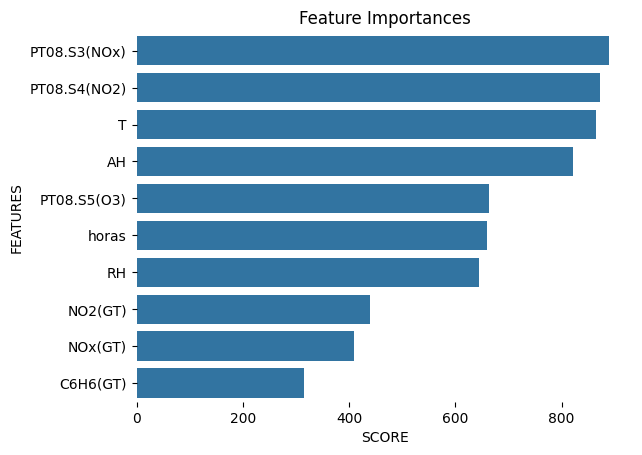

In [85]:
# Mostrando importancia de features
importances = LGBM_final.feature_importances_
indices = np.argsort(importances)

df_FI = pd.DataFrame({'feature':importances, 'colunas':colunas_x}).sort_values(by = 'feature', ascending = False)

sns.barplot(y = df_FI['colunas'][:10], x = df_FI['feature'][:10])

plt.xlabel('SCORE')
plt.ylabel('FEATURES')

plt.title('Top 10: Feature Importances')
plt.show()


> Estas são as 10 features com maior importância para o modelo.

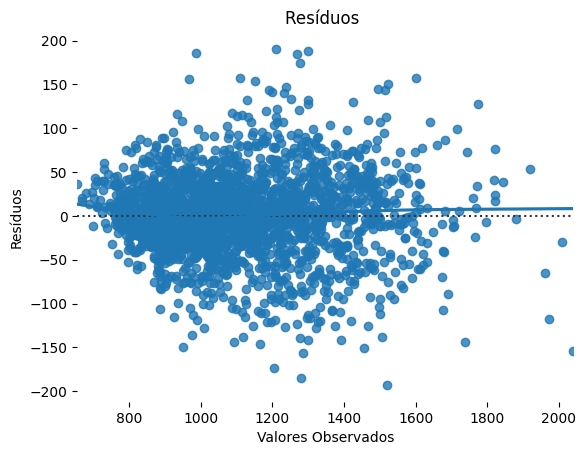

In [89]:
#Plot dos Resíduos
sns.residplot(x=y_teste, y=y_pred, lowess=True)
plt.xlabel('Valores Observados')
plt.ylabel('Resíduos')
plt.title('Resíduos ')
plt.show()

> O plot dos resíduos mostra que o modelo está tendo boas previsões já que está igualmente distribuindo horizontalmente.
Para valores menores os resíduos são menores.

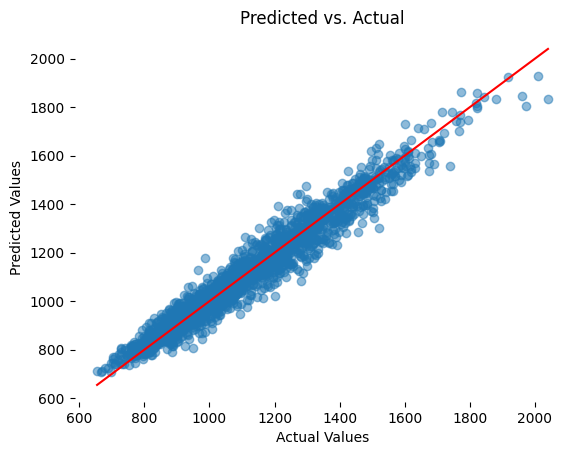

In [90]:
plt.scatter(y_teste, y_pred, alpha=0.5)
plt.plot([min(y_teste), max(y_teste)], [min(y_teste), max(y_teste)], color='red')  # Line y=x
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual')
plt.show()

> O gráficos de dispersão entre entre predição e valores reais mostra que o modelo tem bom podes de predição, com os valores preditos acompanhando os valores reais.

In [91]:
import pickle

# Salvando o modelo
with open('modelo_qualidade_ar.pkl', 'wb') as file:
    pickle.dump(LGBM_final, file)